# ***Check GPU connect***

In [1]:
print("oke nice")

oke nice


In [2]:
import torch 

print(torch.__version__) 
print(torch.cuda.is_available()) 
print(torch.cuda.get_device_name(0))

2.4.0
True
Tesla T4


In [3]:
!nvidia-smi

Sat Sep 28 14:12:18 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.90.07              Driver Version: 550.90.07      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       3MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

# ***Content***

## Clone dataset 

In [4]:
!pip install gdown

In [5]:
!git clone https://github.com/QuanHoangNgoc/data-temp.git

Cloning into 'data-temp'...
remote: Enumerating objects: 18218, done.
remote: Counting objects: 100% (3/3), done.
remote: Total 18218 (delta 0), reused 3 (delta 0), pack-reused 18215 (from 1)
Receiving objects: 100% (18218/18218), 552.74 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (18149/18149), done.


## Install

In [6]:
!pip -q install faiss-gpu

In [7]:
import os
from PIL import Image
import numpy as np
import faiss
# from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import random

## Check dataset and create image_files 

In [8]:
def get_imagelist(root_folder, glob="jpg"): 
    paths = []
    for dirpath, dirnames, filenames in sorted(os.walk(root_folder)): #!!! must sorted 
        for file in filenames:  
            fullpath = os.path.join(dirpath, file)
            if(fullpath.split(".")[-1] != glob): continue
            paths.append(fullpath) 
    return paths

18148 ['/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_89.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_199.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_206.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_131.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_216.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_103.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_191.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_15.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_141.jpg', '/kaggle/working/data-temp/Keyframes_L07/L07_V001/L07_V001_225.jpg']


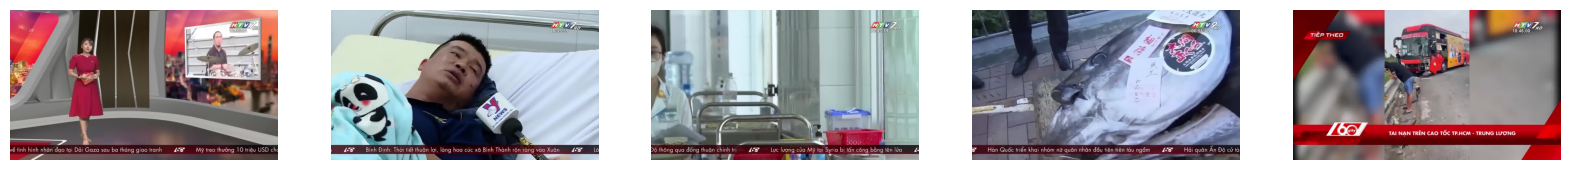

In [9]:
image_folder = "/kaggle/working/data-temp"

image_files = get_imagelist(image_folder)
print(len(image_files), image_files[:10]) 
selected_files = random.sample(image_files, 5)

plt.figure(figsize=(20, 5))

for i, file in enumerate(selected_files):
    image = Image.open(file)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.axis("off")

plt.show()

## Create embeddings and meta 

In [10]:
# # new a embedding model 
# model = SentenceTransformer('clip-ViT-B-32')

# CHUNK_SIZE = 256

# # process each chunk 
# def process_chunk(chunk):
#     images = []
#     for image_file in chunk: images.append(Image.open(image_file))

#     chunk_embeddings = model.encode(images)
#     return chunk_embeddings


# # create the embeddings 
# embeddings = []
# for i in range(0, len(image_files), CHUNK_SIZE):
#     print(i)
#     chunk = image_files[i:i + CHUNK_SIZE]
#     embeddings.extend(process_chunk(chunk))
    
# embeddings 

In [11]:
import gdown  

def drive_down(file_id, name_output_file): 
    url = f'https://drive.google.com/uc?id={file_id}'  
    output = name_output_file  
    gdown.download(url, output, quiet=False)

### clone embedding 

In [12]:
file_id = '1XdR4P7RyK68wGruH1Fw2GNyiNpRHYLpT' 
drive_down(file_id, "emb.npy")
embeddings = np.load('emb.npy')
embeddings.shape 

Downloading...
From (original): https://drive.google.com/uc?id=1XdR4P7RyK68wGruH1Fw2GNyiNpRHYLpT
From (redirected): https://drive.google.com/uc?id=1XdR4P7RyK68wGruH1Fw2GNyiNpRHYLpT&confirm=t&uuid=3b43549d-444a-4eb5-ab00-1fad03e578cd
To: /kaggle/working/emb.npy
100%|██████████| 3.48G/3.48G [01:35<00:00, 36.4MB/s]


(849188, 1024)

### clone meta

In [13]:
import pickle

file_id = '1B-QZqlyoLW8oc4lyi6_tnV7MoUDA84Z-'
drive_down(file_id, "meta.pkl")
with open('meta.pkl', 'rb') as file:
    meta = pickle.load(file)
print(type(meta), len(meta), meta[:10])

Downloading...
From: https://drive.google.com/uc?id=1B-QZqlyoLW8oc4lyi6_tnV7MoUDA84Z-
To: /kaggle/working/meta.pkl
100%|██████████| 16.2M/16.2M [00:00<00:00, 117MB/s]


<class 'list'> 849188 ['L01_V001_1.jpg', 'L01_V001_2.jpg', 'L01_V001_3.jpg', 'L01_V001_4.jpg', 'L01_V001_5.jpg', 'L01_V001_6.jpg', 'L01_V001_7.jpg', 'L01_V001_8.jpg', 'L01_V001_9.jpg', 'L01_V001_10.jpg']


## Create database 

In [14]:
# build vector db 
def create_database(embeddings): 
    dimension = len(embeddings[0])
    db = faiss.IndexFlatIP(dimension)
    db = faiss.IndexIDMap(db)

    # insert embeddings into database 
    vectors = np.array(embeddings).astype('float32')
    db.add_with_ids(vectors, np.array(range(len(embeddings))))
    return db 

In [15]:
db = create_database(embeddings)
db 

<faiss.swigfaiss.IndexIDMap; proxy of <Swig Object of type 'faiss::IndexIDMapTemplate< faiss::Index > *' at 0x7e011017d020> >

## Prepare

In [16]:
!pip install sentence-transformers==2.2.2
!pip install torchscale

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125924 sha256=66d901145b8a4bf0439cdaf0437fbc819d18664e15ba371e918c3e865fcdd8c5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 kB 3.2 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.2/71.2 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 15.2 MB/s eta 0:00:0000:01
  Created wheel for fairscale: filename=fairscale-0.4.0-py3-none-any.whl size=239917 sha256=4f02dad89ceb81aa7

### set-up beit3 repo

In [17]:
file_id = '1Xf3XDVR59ONPNemQ0URS7-djDGssfXaN'
drive_down(file_id, "beit3.zip")
!unzip beit3.zip 
os.listdir('/kaggle/working/BEiT3/checkpoints')

Downloading...
From: https://drive.google.com/uc?id=1Xf3XDVR59ONPNemQ0URS7-djDGssfXaN
To: /kaggle/working/beit3.zip
100%|██████████| 708k/708k [00:00<00:00, 96.2MB/s]


Archive:  beit3.zip
   creating: BEiT3/
  inflating: BEiT3/beit3.py          
   creating: BEiT3/checkpoints/
  inflating: BEiT3/checkpoints/beit3.spm  
  inflating: BEiT3/datasets.py       
  inflating: BEiT3/engine_for_finetuning.py  
  inflating: BEiT3/glossary.py       
  inflating: BEiT3/modeling_finetune.py  
  inflating: BEiT3/modeling_utils.py  
  inflating: BEiT3/optim_factory.py  
  inflating: BEiT3/randaug.py        
  inflating: BEiT3/run_beit3_finetuning.py  
  inflating: BEiT3/test_similarity.py  
  inflating: BEiT3/utils_beit.py     
   creating: BEiT3/__pycache__/


['beit3.spm']

In [18]:
file_id = '1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp'
drive_down(file_id, "beit3.pth")

Downloading...
From (original): https://drive.google.com/uc?id=1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp
From (redirected): https://drive.google.com/uc?id=1e8qULfZLu26e8-wHdtJxCC6wfG72IWMp&confirm=t&uuid=84632c11-e22e-4d49-b6b6-0f02d7bec456
To: /kaggle/working/beit3.pth
100%|██████████| 1.35G/1.35G [00:37<00:00, 35.7MB/s]


### beit3 encoder model 

In [19]:
import BEiT3.beit3 as module

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
checkpoint = "beit3.pth"
sentencepiece_model = os.path.join('/kaggle/working/BEiT3/checkpoints', 'beit3.spm')
model, transform, tokenizer = module.load_model(device, checkpoint, sentencepiece_model)

/kaggle/working/BEiT3/utils_beit.py:526: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(ckpt_path, map_location='cpu')


Load ckpt from beit3.pth
Load state_dict by model_key = model


/opt/conda/lib/python3.10/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### translate 

In [20]:
!pip install googletrans==3.1.0a0

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 103.8 kB/s eta 0:00:00 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 295.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 242.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 180.5 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 284.6 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 170.4 kB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 337.6 kB/s eta 0:00:00a 0:00:01
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16353 sha256=32c251605dd91ecda2f8159b4aac778b8654829248c3110ac32ede820c8129b0
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: h11
    Foun

In [21]:
from googletrans import Translator
translator = Translator()

## Process 

In [22]:
from collections import defaultdict

index_namefile = defaultdict(list)
for index, namefile in enumerate(meta): 
    index_namefile[namefile] = index
    
vectors = np.array(embeddings).astype('float32')
vectors.shape 

(849188, 1024)

In [23]:
def stt_to_frameid(stt: int): 
    return (stt-1) * 25 

def frameid_to_stt(frameid: int): 
    return (frameid // 25) + 1

In [24]:
def encode(component: str):
    if component.endswith(".jpg") or component.endswith(".png"):
        image = Image.open(component)
        emb = module.encode_image(model, transform, image, device)
        emb = emb.astype("float32").reshape(1, -1)
        
        plt.imshow(image) # Them 
        plt.axis('off') # Hide the axes
        plt.show()
        return emb 
    
    elif len(component.split(",")) == 2 and component[:2] == "L0": 
        video, frame_id = component.split(",")
        frame_id = int(frame_id)
        stt = frameid_to_stt(frame_id)
        namefile = f"{video}_{stt}.jpg"
        i = index_namefile[namefile]
        return vectors[i].reshape(1, -1) 
    
    text = translator.translate(component, dest='en').text
    emb = module.encode_text(model, tokenizer, text, device)
    emb = emb.astype("float32").reshape(1, -1)
    print("Encode: ", text) # Them 
    return emb 

    
def norm_n2d(n2d):
    matrix = np.array(n2d).astype('float32')
    # Calculate the norms of each row (vector)  
    norms = np.linalg.norm(matrix, axis=1, keepdims=True)  
    # Normalize each vector (handling possible division by zero)  
    normalized_matrix = np.divide(matrix, norms, out=np.zeros_like(matrix), where=norms!=0)  
    return normalized_matrix

In [25]:
def compute_cosines(vectors_norm, emb_norm): 
    cosine_similarities = np.dot(vectors_norm, emb_norm.reshape(-1))
    return cosine_similarities

def argsort(cosine_similarities):
    K = len(cosine_similarities) 
    argsort_indices = np.argsort(cosine_similarities)[-K:][::-1]
    return argsort_indices # permutation

In [75]:
def db_indices_to_files(db_indices, fn_name=">>>db_inds to files\n"): 
    files = [meta[i] for i in db_indices] 
    print(fn_name, files[:5]) 
    return files 

def namefiles_to_resultlist(namefiles, fn_name=">>>to result_list\n"):
    result = [] 
    for name in namefiles: 
        stt = int(name.split('_')[-1].split('.')[0])
        frame_id = stt_to_frameid(stt=stt) 
        video = name.split('_')[0] + '_' + name.split('_')[1]
        result.append([video, frame_id])
        
    print(fn_name, result[:5])
    return result 

import csv 
def to_csv(result, path='data.csv'): 
    with open(path, 'w', newline='') as csvfile:
        # Create a CSV writer object
        writer = csv.writer(csvfile)
    
        # Write the data to the CSV file
        writer.writerows(result)
    
    print("Path:", path)

In [76]:
def search_on_db(des, db, top_k, fn_name=">>>search on db\n"):
    text = translator.translate(des, dest='en').text
    emb = module.encode_text(model, tokenizer, text, device)
    emb = emb.astype("float32").reshape(1, -1)
    print(fn_name, text, emb.shape) 
    
    rels, db_indices = db.search(emb, top_k)
    print(fn_name, rels[0][:5], db_indices[0][:5])
    return db_indices[0]

In [77]:
vectors[[0, 1, 2]].shape
norm_n2d(vectors[[0, 1, 2]]).shape

(3, 1024)

In [81]:
def search_two_pharse(des, db, components: tuple=(), top_k=100, top_h=100, path='file.csv'): 
    db_indices = search_on_db(des, db, top_k)
    
    
    if(len(components) > 0): 
        vectors_norm = norm_n2d(vectors[db_indices]) 
        print(">>>component processing...")
        print("-", vectors_norm.shape)
        
        emb = encode(component=components[0])
        emb_norm = norm_n2d(emb) 
        print("-", components[0] + ":", emb_norm.shape) 
        
        scores = compute_cosines(vectors_norm=vectors_norm, emb_norm=emb_norm)
        for i in range(1, len(components)):
            cpn = components[i]
            emb = encode(component=cpn)
            emb_norm = norm_n2d(emb) 
            print("-", cpn + ":", emb_norm.shape) 
            
            scores = scores * compute_cosines(vectors_norm=vectors_norm, emb_norm=emb_norm)
        
        per = argsort(scores) 
        assert len(per) == len(db_indices)
        db_indices = db_indices[per]
        print("-", per[:5], db_indices[:5], scores[per[:5]])
        
        
    db_indices = db_indices[:top_h]
    files = db_indices_to_files(db_indices=db_indices)
    result = namefiles_to_resultlist(namefiles=files)
    to_csv(result=result, path=path)

In [83]:
des = "Cậu bé màu xanh lá" 
top_k = 8500
top_h = 100 
cpns = ()

search_two_pharse(des, db, cpns, top_k, top_h)

>>>search on db
 Green boy (1, 1024)
>>>search on db
 [0.68818045 0.6845924  0.68312865 0.6805614  0.68025225] [ 86735 743401  86749  86747 185283]
>>>db_inds to files
 ['L03_V014_335.jpg', 'L21_V006_417.jpg', 'L03_V014_349.jpg', 'L03_V014_347.jpg', 'L06_V007_667.jpg']
>>>to result_list
 [['L03_V014', 8350], ['L21_V006', 10400], ['L03_V014', 8700], ['L03_V014', 8650], ['L06_V007', 16650]]
Path: file.csv


## Main script

In [84]:
import shutil, csv

def main_submit(in_folder, out_folder):
    if os.path.exists(out_folder): 
        shutil.rmtree(out_folder)
    os.makedirs(out_folder, exist_ok=True)
    print(f"-\/- Remove and renew [{out_folder}]\n")
    
    for namefile in os.listdir(in_folder):
        with open(os.path.join(in_folder, namefile), 'r') as file:
            # Read the entire file content
            content = file.read()
            des = content.replace("\n", " ")
            path = os.path.join(out_folder, namefile.replace(".txt", ".csv"))
            
            search_two_pharse(des, db, top_k=100, top_h=100, path=path) #!!! Main 
            print("\n")

In [85]:
in_folder = '/kaggle/input/test-dot-2/pack2-groupA'
out_folder = '/kaggle/working/submit'
main_submit(in_folder, out_folder)

# Specify the folder to compress and the output ZIP file name  
folder_to_compress = out_folder
output_zip_file = out_folder + '.zip'  

# Compress the runs to zip 
shutil.make_archive(output_zip_file.replace('.zip', ''), 'zip', folder_to_compress)

-\/- Remove and renew [/kaggle/working/submit]

>>>search on db
 A man wearing a black shirt and short hair is installing or adjusting a metal plate on the underside of an airplane. Initially it was a frontal angle and then a close-up shot of this person's face. (1, 1024)
>>>search on db
 [0.7271502  0.70696455 0.7055134  0.69979614 0.69169533] [288415 288412 288354 288398 288418]
>>>db_inds to files
 ['L09_V001_81.jpg', 'L09_V001_78.jpg', 'L09_V001_20.jpg', 'L09_V001_64.jpg', 'L09_V001_84.jpg']
>>>to result_list
 [['L09_V001', 2000], ['L09_V001', 1925], ['L09_V001', 475], ['L09_V001', 1575], ['L09_V001', 2075]]
Path: /kaggle/working/submit/query-p2-15-kis.csv


>>>search on db
 Scene in a bicycle race, the three leading riders take turns wearing blue shirts; green; red yellow black. The race team is going through a bend where there is a sign commemorating the 70th anniversary of the victory of Dien Bien Phu." The word Dien Bien Phu has a rainbow gradient color from right to left. (1, 

'/kaggle/working/submit.zip'

## Extent (Attention) 

In [86]:
def attention(term_list: tuple, fn_name=">>>attention\n"): # [(1, 1024)]
    # Calculate query, key, and value matrices
    torch_list = [torch.from_numpy(x).to(device) for x in term_list]
    query = key = value = embs = torch.cat(torch_list) # (N, 1024)
    print(fn_name, embs.shape)

    # Calculate attention scores
    scores = torch.matmul(query, key.transpose(-2, -1)) / (embs.shape[-1] ** 0.5)
    # Apply softmax to get attention weights
    attention_weights = torch.nn.functional.softmax(scores, dim=-1)
    print(fn_name, attention_weights.shape)

    # Calculate context vector
    hyper_terms = torch.matmul(attention_weights, value)
    hterm_list = [hyper_terms[i].cpu().numpy().astype('float32').reshape(1, -1) for i in range(len(hyper_terms))]
    print(fn_name, hyper_terms.shape, len(hterm_list))
    return hterm_list # (N, 1024) 

In [87]:
def to_hterm_list(text_list: tuple, use_attention=True): 
    print(text_list, "use attention is", use_attention)
    
    term_list = [encode(text) for text in text_list]
    if(use_attention == False): return term_list
    
    hterm_list = attention(term_list)
    return hterm_list

In [71]:
def search_attention_multext(text_list: tuple, db, top_k=100, top_h=100, path='file.csv'):
    hterm_list = to_hterm_list(text_list, True)
    
    sterm = 0 
    for x in hterm_list: sterm = x + sterm 
        
    _, db_indices = db.search(sterm, top_k)
    db_indices = db_indices[0]
    
    
    if(len(hterm_list) > 1): 
        vectors_norm = norm_n2d(vectors[db_indices]) 
        print(">>>hyper term processing...")
        print("-", vectors_norm.shape)
    
        emb = hterm_list[0] 
        emb_norm = norm_n2d(emb) 
        print("-", emb_norm.shape) 
        
        scores = compute_cosines(vectors_norm=vectors_norm, emb_norm=emb_norm)
        for i in range(1, len(hterm_list)):
            emb = hterm_list[i] 
            emb_norm = norm_n2d(emb) 
            print("-", emb_norm.shape) 
            
            scores = scores * compute_cosines(vectors_norm=vectors_norm, emb_norm=emb_norm)
        
        per = argsort(scores) 
        assert len(per) == len(db_indices)
        db_indices = db_indices[per]
        print("-", per[:5], db_indices[:5], scores[per[:5]])
        
        
    db_indices = db_indices[:top_h]
    files = db_indices_to_files(db_indices=db_indices)
    result = namefiles_to_resultlist(namefiles=files)
    to_csv(result=result, path=path)

In [88]:
text_list = (
    "Thông tin về một địa điểm có logo Apple, với chữ 'robyns' nằm ngay dưới logo và có kích thước tương đương.",
    "Một địa điểm xuất hiện logo Apple, dưới logo là chữ 'robyns' có cùng kích thước.",
    "Tin tức về một địa điểm có biểu tượng Apple, từ 'robyns' được đặt bên dưới logo với kích thước tương tự.",
    "Thông tin về một nơi có logo Apple, với chữ 'robyns' nằm phía dưới, kích thước ngang bằng với logo.",
    "Địa điểm với logo Apple và từ 'robyns' ngay dưới, kích thước của từ này bằng với logo."
)

In [89]:
top_k = 8500
top_h = 500

search_attention_multext(text_list, db, top_k, top_h=top_h)

("Thông tin về một địa điểm có logo Apple, với chữ 'robyns' nằm ngay dưới logo và có kích thước tương đương.", "Một địa điểm xuất hiện logo Apple, dưới logo là chữ 'robyns' có cùng kích thước.", "Tin tức về một địa điểm có biểu tượng Apple, từ 'robyns' được đặt bên dưới logo với kích thước tương tự.", "Thông tin về một nơi có logo Apple, với chữ 'robyns' nằm phía dưới, kích thước ngang bằng với logo.", "Địa điểm với logo Apple và từ 'robyns' ngay dưới, kích thước của từ này bằng với logo.") use attention is True
Encode:  Information about a location with the Apple logo, with the word 'robyns' directly below the logo and about the same size.
Encode:  A location where the Apple logo appears, below the logo is the word 'robyns' of the same size.
Encode:  News of a location with the Apple logo, the word 'robyns' placed below the logo in a similar size.
Encode:  Information about a place with the Apple logo, with the word 'robyns' underneath, the same size as the logo.
Encode:  Place with t